In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage import exposure
from scipy import fft
from scipy import signal
import timeit

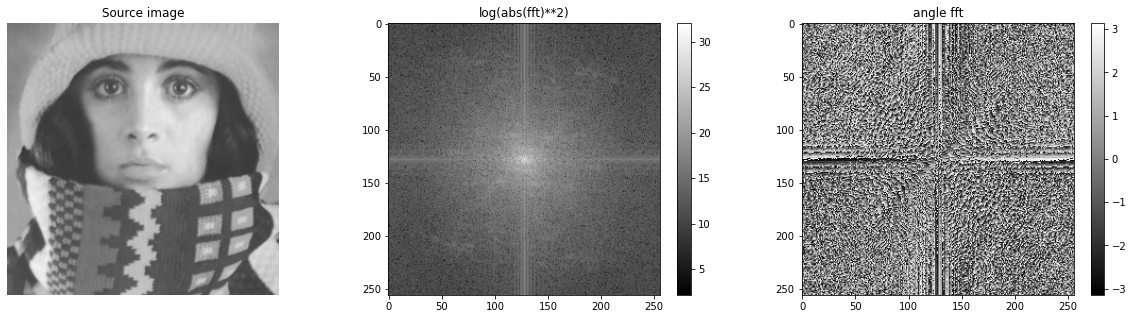

In [137]:
def image_fft(image):
  fft_img = fft.fft2(image)
  fft_shift_img = fft.fftshift(fft_img)
  magnitude  = np.abs(fft_shift_img)
  phase = np.angle(fft_shift_img)
  # phase = fft.fftshift(np.angle(fft_img))

  return magnitude, phase

def task1():
  img = imread('trui.png')
  magnitude, phase = image_fft(img)
  
  grid = plt.GridSpec(nrows=1, ncols=3, wspace=0.2, hspace=0.2)
  plt.figure(figsize = (21, 5))  
  
  plt.subplot(grid[0, 0])
  plt.imshow(img, cmap="gray", vmax=255, vmin=0)
  plt.axis('off')
  plt.title("Source image")

  plt.subplot(grid[0, 1])
  plt.imshow(np.log(magnitude**2), cmap="gray")
  # plt.imshow(10*np.log10(abs(fft_img)**2) / np.max(np.max(np.log(abs(fft_img)))), cmap="jet")
  plt.colorbar()
  plt.title('log(abs(fft)**2)')

  plt.subplot(grid[0, 2])
  # plt.imshow(np.log(abs(fft_shift_img)) / np.max(np.max(np.log(abs(fft_shift_img)))), cmap="jet")
  plt.imshow(phase, cmap="gray")
  plt.colorbar()
  plt.title('angle fft')
  plt.savefig('1.png',bbox_inches='tight')
  plt.show()
task1()

<ipython-input-163-650dc07152a2>:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


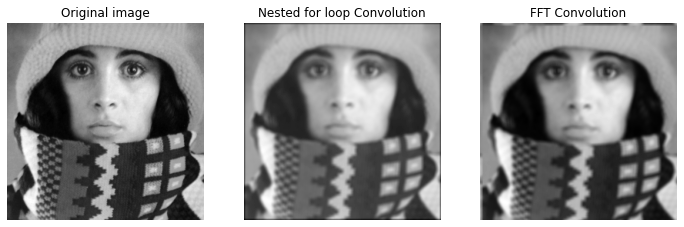

In [163]:
def convolution2d(image, kernel): 
    w, h = image.shape
    kernel = np.flip(kernel)
    m, n = kernel.shape
    kernel_w = m // 2
    kernel_h = n // 2
    # padding process for boundary pixels
    _img = np.zeros((w+2*kernel_w,h+2*kernel_h), dtype=float)
    _img[kernel_w:kernel_w+w,kernel_h:kernel_h+h] = image.copy()
    padding_img = _img.copy()
    new_image = np.zeros_like(padding_img)
    for i in range(kernel_w, kernel_w + w):
        for j in range(kernel_h, kernel_h + h):
            window = padding_img[i-kernel_w : int(np.ceil(i+m/2)), j-kernel_h : int(np.ceil(j+n/2))]
            new_image[i, j] = np.sum(window * kernel) 
    return new_image[kernel_w  : w+kernel_w , kernel_h:  h+kernel_h]


def convolution_fft(image, kernel):
    # x1, y1 = image.shape
    # x2, y2 = kernel.shape
    # x = x1 + x2 - 1
    # y = y1 + y2 - 1
    # xsize = 2 ** np.ceil(np.log2(x)).astype(int)
    # ysize = 2 ** np.ceil(np.log2(y)).astype(int)
    # print(ysize)
    # fft_image = fft.fft2(image, [xsize, ysize])
    # fft_kernel = fft.fft2(kernel, [xsize, ysize])
    # fft_new_image = fft_image * fft_kernel
    # new_image = fft.ifft2(fft_new_image, [xsize, ysize])
    
    fft_image = fft.fft2(image)
    fft_kernel = fft.fft2(kernel, image.shape)
    fft_new_image = fft_image * fft_kernel
    new_image = fft.ifft2(fft_new_image, image.shape)
    return new_image

def test2_2():
  img = imread('trui.png')
#   kernel =  [(-1,-2,-3),(-4,-5,-6),(-7,-8,-9)]
  # kernel =  [(1,2,1),(2,0,2),(1,2,1)] 
  # kernel =  [(0,0,0),(0,1,0),(0,0,0)] 
  kernel =  np.ones([5,5])
  # kernel =  [(0,1,1,0),(1,2,2,1),(1,2,2,1),(0,1,1,0)] 
  kernel = np.asarray(kernel)  
  # i,j = (125,25)

  # img1 = signal.convolve2d(img, kernel, mode='same')
  new_image1 = convolution2d(img, kernel)
  new_image2 = abs(convolution_fft(img, kernel))
  # new_image2 = signal.fftconvolve(img, kernel)
  # print(img1.shape)
  # print(new_image1.shape)
  # print(new_image2.shape)
  # print(img1[i,j])
  # print(new_image1[i,j])
  # print(new_image2[i+1,j+1])

  fig, axs = plt.subplots(1, 3, figsize=(12, 4))
  axs[0].imshow(img, cmap="gray")
  axs[0].axis('off')
  axs[0].set_title("Original image")
  
  axs[1].imshow(new_image1, cmap="gray")
  axs[1].axis('off')
  # axs[1].imshow(new_image1, cmap="gray", vmax=255, vmin=0)
  # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
  axs[1].set_title('Nested for loop Convolution')


  # axs[2].imshow(new_image2, "gray", vmax=255, vmin=0)
  axs[2].imshow(new_image2, "gray")
  axs[2].axis('off')
  # axs[2].imshow(new_image2)
  # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
  axs[2].set_title('FFT Convolution')
  fig.savefig('2.png') 
  fig.show()
  
test2_2()


(2, 2)
(4, 4)
(8, 8)
(16, 16)
(32, 32)
(64, 64)
(128, 128)
(256, 256)


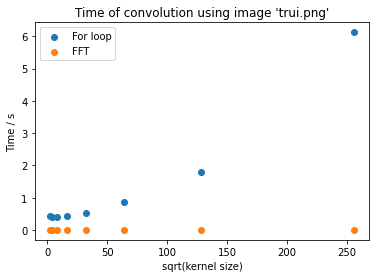

In [161]:
# np.random.seed(5)
def task1_2_2(sizes):
    img = imread('trui.png')
    time_nf = []
    time_fft=[]

    for n in np.arange(1,sizes):
        kernel = np.random.randint(0,5,(2**n,2**n))
        # kernel = np.random.rand(2**n,2**n)
        print(kernel.shape)
        start1 = timeit.default_timer()
        new_image1 = convolution2d(img, kernel)
        time_nf.append(timeit.default_timer()-start1)
        start2 = timeit.default_timer()
        new_image2 = convolution_fft(img, kernel)
        time_fft.append(timeit.default_timer()-start2)
    X =  2 ** np.arange(1,sizes)
    plt.scatter(X,time_nf, label="For loop")
    plt.scatter(X,time_fft, label="FFT")
    plt.xlabel("sqrt(kernel size)")
    plt.ylabel("Time / s")
    plt.title("Time of convolution using image 'trui.png'")
    plt.legend()
    plt.savefig('3.png',bbox_inches='tight')
    plt.show()

task1_2_2(9)

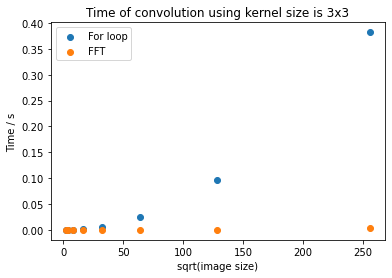

In [160]:
def task1_2_3(sizes):
    img = imread('trui.png')
    time_nf = []
    time_fft=[]
    kernel =  [(1,2,1),(2,0,2),(1,2,1)] 

    for n in np.arange(1,sizes):
        img1 = img[:2**n, :2**n]

        # print(img1.shape)

        start1 = timeit.default_timer()
        new_image1 = convolution2d(img1, kernel)
        time_nf.append(timeit.default_timer()-start1)
        start2 = timeit.default_timer()
        new_image2 = convolution_fft(img1, kernel)
        time_fft.append(timeit.default_timer()-start2)
        
    X =  2 ** np.arange(1,sizes)
    plt.scatter(X, time_nf, label="For loop")
    plt.scatter(X, time_fft, label="FFT")
    plt.xlabel("sqrt(image size)")
    plt.ylabel("Time / s")
    # plt.yscale('log')
    plt.title("Time of convolution using kernel size is 3x3")
    plt.legend()
    plt.savefig('4.png',bbox_inches='tight')
    # plt.show()

task1_2_3(9)

8.191451123618364
14.972405938401852
-25.976687367588553


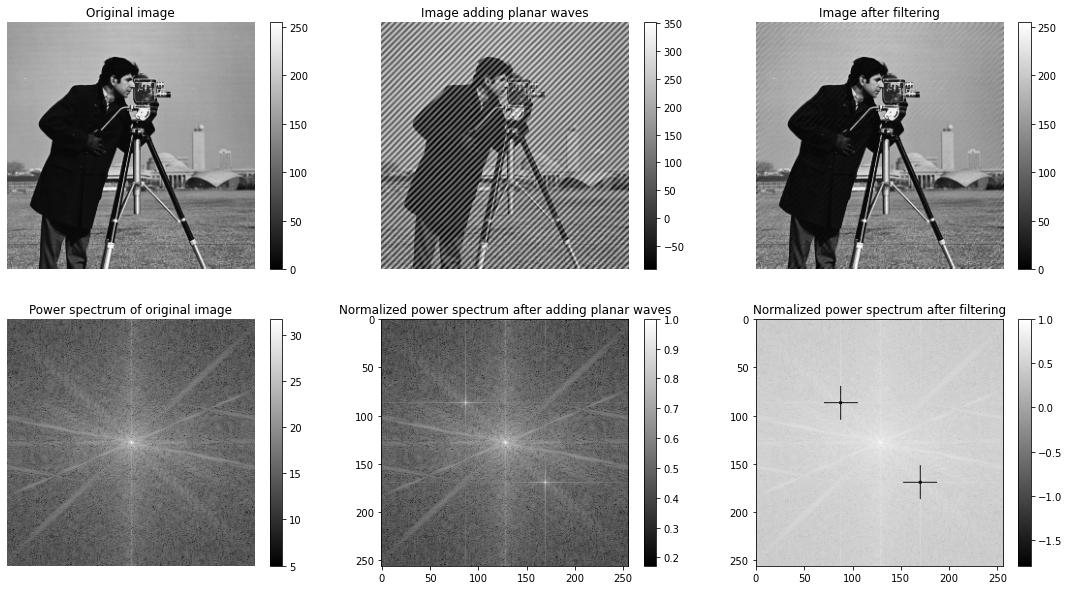

In [167]:
def cos2d(x1, x2, alpha, u, v):
    return alpha*np.cos(u*x1 + v*x2)

def add_planar_waves(image, alpha, u, v):
    m, n = image.shape
    M = np.linspace(0, m, m)
    N = np.linspace(0, n, n)
    X1, X2 = np.meshgrid(M, N)
    planar_waves = cos2d(X1, X2, alpha, u, v)
    new_image = image.astype(float) + planar_waves
    return new_image

def filter_planar_waves(image, u, v):
    m, n = image.shape
    fft_image = fft.fft2(image)

    blank_image = np.zeros([m, n])
    planar_waves = add_planar_waves(blank_image, 1, u, v)
    fft_planar_waves = fft.fft2(planar_waves)

    mask = np.log(abs(fft_planar_waves)) / np.max(np.max(np.log(abs(fft_planar_waves))))
    mask = np.where(mask > 0.5, 0, 1)

    fft_new_image = fft_image * mask
    new_image = fft.ifft2(fft_new_image, image.shape)
    return new_image

def test1_3():
  img = imread('cameraman.tif')
  # u = 3.1415926535 * 0.8
  u=1
  v = u
  image_add_wave = add_planar_waves(img, 100, u, v)
  new_image = filter_planar_waves(image_add_wave, u, v)

  fft_img = fft.fftshift(fft.fft2(img))
  fft_img_add_wave = fft.fftshift(fft.fft2(image_add_wave))
  fft_new_img = fft.fftshift(fft.fft2(new_image))
  print(np.log(abs(fft_img))[87,87])
  print(np.log(abs(fft_img_add_wave))[87,87])
  print(np.log(abs(fft_new_img))[87,87])
  # i,j = (10,10)
  # print(img[i,j])
  # print(image_add_wave[i,j])
  # print(abs(new_image)[i,j])

  grid = plt.GridSpec(nrows=2, ncols=3, wspace=0.2, hspace=0.2)
  plt.figure(figsize = (19, 10))  

  plt.subplot(grid[0, 0])
  plt.imshow(img, cmap="gray", vmax=255, vmin=0)
  plt.colorbar()
  plt.axis('off')
  plt.title("Original image")

  plt.subplot(grid[0, 1])
  plt.imshow(image_add_wave, cmap="gray")
  # plt.imshow(10*np.log10(abs(fft_img)**2) / np.max(np.max(np.log(abs(fft_img)))), cmap="jet")
  plt.colorbar()
  plt.axis('off')
  plt.title('Image adding planar waves')

  plt.subplot(grid[0, 2])
  plt.imshow(abs(new_image), "gray", vmax=255, vmin=0)
  # plt.imshow(new_image.real, "gray")
  plt.axis('off')
  plt.colorbar()
  plt.title('Image after filtering')

  plt.subplot(grid[1, 0])
  plt.imshow(np.log(abs(fft_img)**2), cmap="gray")
  plt.axis('off')
  plt.colorbar()
  plt.title("Power spectrum of original image")

  plt.subplot(grid[1, 1])
#   plt.imshow(np.log(abs(fft_img_add_wave)), cmap="gray")
  plt.imshow(np.log(abs(fft_img_add_wave)) / np.max(np.max(np.log(abs(fft_img_add_wave)))), cmap="gray")
  plt.colorbar()
  plt.title('Normalized power spectrum after adding planar waves')

  logabsfft = np.log(abs(fft_new_img)) 
  plt.subplot(grid[1, 2])
  plt.imshow(logabsfft / np.max(np.max(logabsfft)), cmap="gray")
#   plt.imshow(np.log(abs(fft_new_img)), "gray")
  plt.colorbar()
  plt.title('Normalized power spectrum after filtering') 
  

  plt.savefig('5.png',bbox_inches='tight')
  plt.show()
  return logabsfft / np.max(np.max(logabsfft))


#   fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# #   fig, axs = plt.subplots(1, 3, figsize=(12, 4))
#   axs[0, 0].imshow(img, cmap="gray", vmax=255, vmin=0)
#   axs[0, 0].axis('off')
#   axs[0, 0].set_title("Original image")
  
#   axs[0, 1].imshow(image_add_wave, cmap="gray")
#   # axs[1].imshow(new_image1, cmap="gray", vmax=255, vmin=0)
#   # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
#   axs[0, 1].set_title('CDF for the image \'pout.tif\'')
#   axs[0, 1].set_xlabel('Intensity value')
#   axs[0, 1].set_ylabel('Fraction of pixels')

#   # axs[2].imshow(new_image2, "gray", vmax=255, vmin=0)
#   axs[0, 2].imshow(abs(new_image), "gray", vmax=255, vmin=0)
#   # axs[2].imshow(new_image2)
#   # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
#   axs[0, 2].set_title('CDF for the image \'pout.tif\'')
#   axs[0, 2].set_xlabel('Intensity value')
#   axs[0, 2].set_ylabel('Fraction of pixels')

#   axs[1, 0].imshow(np.log(abs(fft_img)), cmap="gray")
#   axs[1, 0].axis('off')
#   axs[1, 0].set_title("Original image")
  
#   axs[1, 1].imshow(np.log(abs(fft_img_add_wave)), cmap="gray")
#   # axs[1].imshow(new_image1, cmap="gray", vmax=255, vmin=0)
#   # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
#   axs[1, 1].set_title('CDF for the image \'pout.tif\'')
#   axs[1, 1].set_xlabel('Intensity value')
#   axs[1, 1].set_ylabel('Fraction of pixels')

#   # axs[2].imshow(new_image2, "gray", vmax=255, vmin=0)
#   axs[1, 2].imshow(np.log(abs(fft_new_img)), "gray")
#   # axs[2].imshow(new_image2)
#   # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
#   axs[1, 2].set_title('CDF for the image \'pout.tif\'')
#   axs[1, 2].set_xlabel('Intensity value')
#   axs[1, 2].set_ylabel('Fraction of pixels')
#   # fig.savefig('2.1.png') 
#   fig.show()
  
a = test1_3()
# print(a[87,87])

# b = np.where(a > 0.8, 0, 1)
# print(b)